In [60]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn import datasets
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import linear_model 

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold

from sklearn.inspection import permutation_importance

In [35]:
train_df = pd.read_csv('../data/final_diamonds_train.csv', index_col=[0])
train_df.head()

,price,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,3733,1.01,65.2,56.0,6.23,6.19,4.05,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,9452,1.51,65.0,64.0,7.10,7.03,4.59,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,12765,2.00,65.2,56.0,7.92,7.87,5.15,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,17713,1.99,60.5,63.0,8.20,8.11,4.93,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,2268,0.70,65.0,56.0,5.60,5.50,3.61,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [36]:
feature_names = train_df.columns
print("Feature names:", feature_names)

Feature names: Index(['price', 'carat', 'depth', 'table', 'x', 'y', 'z', 'city_Amsterdam',
       'city_Antwerp', 'city_Dubai', 'city_Kimberly', 'city_Las Vegas',
       'city_London', 'city_Luxembourg', 'city_Madrid', 'city_New York City',
       'city_Paris', 'city_Surat', 'city_Tel Aviv', 'city_Zurich', 'cut_Fair',
       'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_D',
       'color_E', 'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')


In [37]:
# creating X and y

X = train_df.drop('price', axis=1)
X.head()

,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,city_Kimberly,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1.01,65.2,56.0,6.23,6.19,4.05,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.51,65.0,64.0,7.10,7.03,4.59,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2.00,65.2,56.0,7.92,7.87,5.15,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.99,60.5,63.0,8.20,8.11,4.93,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.70,65.0,56.0,5.60,5.50,3.61,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [38]:
y = train_df['price']
y

0         3733
1         9452
2        12765
3        17713
4         2268
         ...  
40450     3193
40451    15898
40452      666
40453     1945
40454     6521
Name: price, Length: 40455, dtype: int64

In [39]:

#  Data scaling
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)


In [40]:
%%time

# Model definition

model = GradientBoostingRegressor()
model

CPU times: total: 0 ns
Wall time: 5.65 ms


GradientBoostingRegressor()

In [41]:
model.fit(X, y)

GradientBoostingRegressor()

In [42]:
'''
# Define the parameter grid for GridSearchCV
param_grid =   {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}
'''

"\n# Define the parameter grid for GridSearchCV\nparam_grid =   {\n    'n_estimators': [50, 100, 200],\n    'learning_rate': [0.1, 0.01, 0.001],\n    'max_depth': [3, 5, 7]\n}\n"

In [43]:
'''
# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=model, 
                           param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5)
'''

"\n# Create an instance of GridSearchCV\ngrid_search = GridSearchCV(estimator=model, \n                           param_grid=param_grid, \n                           scoring='neg_mean_squared_error', \n                           cv=5)\n"

In [44]:
'''
%%time
# Fit the GridSearchCV object on my data
grid_search.fit(X, y)
'''

'\n%%time\n# Fit the GridSearchCV object on my data\ngrid_search.fit(X, y)\n'

In [45]:
# Compute permutation feature importance

result = permutation_importance(model, X, y, n_repeats=10, random_state=42)
result

{'importances_mean': array([2.12351952e-01, 5.86498850e-04, 3.49103377e-05, 5.48757007e-03,
        8.30623851e-01, 4.45159910e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.37209294e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.94611351e-06, 9.50015598e-04, 0.00000000e+00, 0.00000000e+00,
        4.19301066e-03, 1.75918656e-03, 1.26393255e-03, 2.02017592e-04,
        3.93185758e-03, 1.07947569e-02, 2.16080784e-02, 2.26559646e-02,
        1.10371725e-02, 7.25573424e-03, 3.70464950e-02, 1.78026776e-03,
        1.80599552e-05, 8.97468284e-03, 9.10507048e-03]),
 'importances_std': array([1.06841936e-03, 2.61299066e-05, 4.86792521e-06, 4.57169285e-05,
        2.52933677e-03, 3.08589913e-04, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00,

In [46]:
# Extract the feature importance scores and feature names

importance_scores = result.importances_mean
sorted_indices = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_features = np.array(feature_names)[sorted_indices]

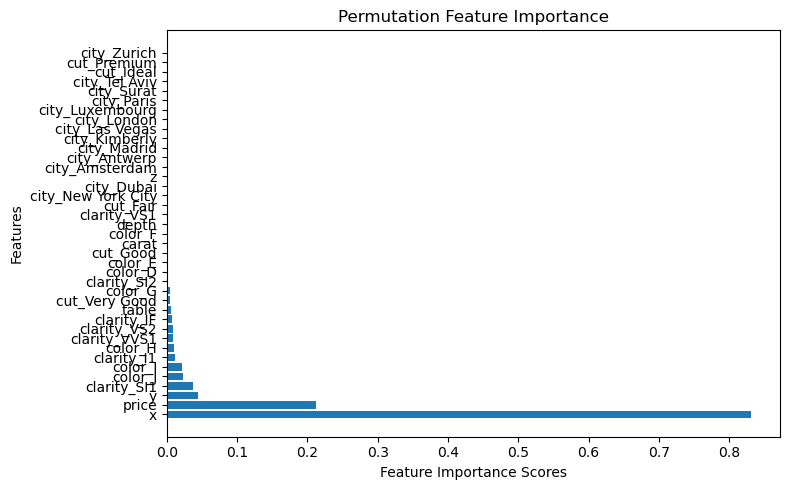

In [47]:
# Plot the feature importance scores

plt.figure(figsize=(8, 5))
plt.barh(range(len(sorted_scores)), sorted_scores, align='center')
plt.yticks(range(len(sorted_scores)), sorted_features)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title('Permutation Feature Importance')
plt.tight_layout()
plt.show()

In [48]:
'''
# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
best_model
'''

'\n# Get the best estimator and its parameters\nbest_model = grid_search.best_estimator_\nbest_model\n'

In [49]:
'''
best_params = grid_search.best_params_
best_params
'''

'\nbest_params = grid_search.best_params_\nbest_params\n'

In [51]:
%%time

# Model predictions

predictions = model.predict(X)
predictions

CPU times: total: 156 ms
Wall time: 235 ms


array([ 5023.32517872,  8893.34192576, 14632.24904155, ...,
         648.28801792,  1907.41754256,  4654.03650704])

In [52]:
# RMSE

real_error = round(mean_squared_error(y, predictions)**0.5, 5)
real_error

713.57997

In [53]:
# test diamond ML

test_df = pd.read_csv('../data/final_diamonds_test.csv',index_col=[0])
test_df.head()

,carat,depth,table,x,y,z,city_Amsterdam,city_Antwerp,city_Dubai,city_Kimberly,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.79,62.7,60.0,5.82,5.89,3.67,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1.20,61.0,57.0,6.81,6.89,4.18,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1.57,62.2,61.0,7.38,7.32,4.57,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.90,63.8,54.0,6.09,6.13,3.90,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0.50,62.9,58.0,5.05,5.09,3.19,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [177]:
# Get the best estimator and its parameters
best_model = grid_search.best_estimator_
best_model

GradientBoostingRegressor(max_depth=7, n_estimators=200)

In [61]:
'''
%%time
# Fit the GridSearchCV object on my data
grid_search.fit(X, y)
''''

SyntaxError: unterminated string literal (detected at line 5) (479540490.py, line 5)

In [55]:
%%time
# Model predictions

predictions = model.predict(test_df)
predictions

CPU times: total: 46.9 ms
Wall time: 78.6 ms


array([ 2825.75248706,  6519.0650293 , 10682.39997596, ...,
        2942.79326281,  2324.21873888,   715.16278336])

In [56]:
# Create a dataframe with the predicted price
predictions_df = pd.DataFrame({'price': predictions})
predictions_df

,price
0,2825.752487
1,6519.065029
2,10682.399976
3,3834.296070
4,1646.251990
...,...
13480,1652.282881
13481,2529.167421
13482,2942.793263
13483,2324.218739


In [57]:
# Set the name of the index as 'id'
predictions_df = predictions_df.rename_axis('id')
predictions_df.head()

,price
id,
0,2825.752487
1,6519.065029
2,10682.399976
3,3834.296070
4,1646.251990


In [58]:
predictions_df.to_csv('../predictions/predict-29.csv')